In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
data = load_iris()


In [25]:
iris = pd.DataFrame(data.data)
iris.columns = data.feature_names
iris['target'] = data.target

iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [26]:
iris1 = iris.loc[iris.target.isin([1,2]),['petal length (cm)','petal width (cm)','target']]

In [27]:
# separar x e y para grafico

X = iris1.drop('target', axis=1)
y=iris1.target

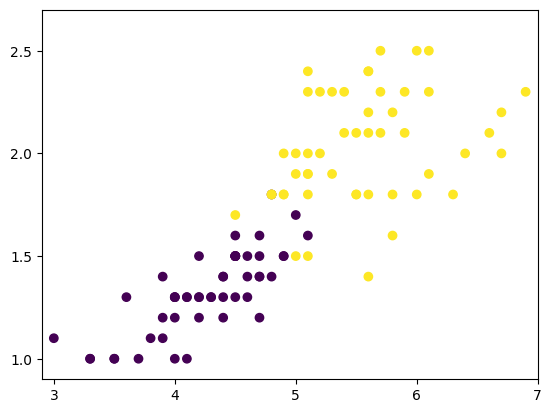

In [28]:
fig, ax = plt.subplots()

ax.scatter(
    X['petal length (cm)'],
    X['petal width (cm)'],
    c=y,
    )

ax.set(xlim=(2.9,7), xticks=[3,4,5,6,7],
       ylim=(0.9,2.7), yticks=[1,1.5,2,2.5])

plt.show()

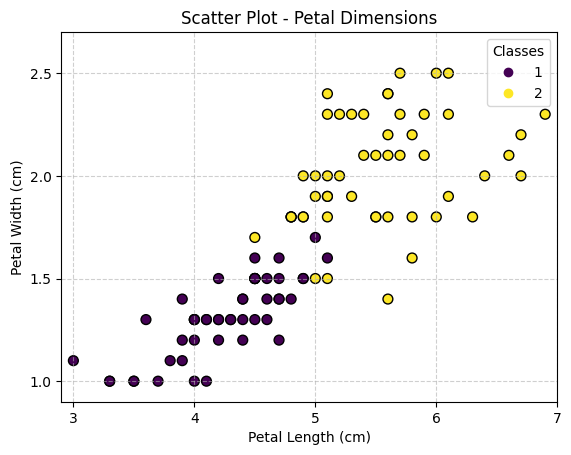

In [33]:
# Criação do scatter plot com cores distintas para cada classe
scatter = plt.scatter(
    X['petal length (cm)'],
    X['petal width (cm)'],
    c=y,
    cmap='viridis',  # Escolha uma paleta de cores apropriada
    edgecolors='k',  # Adiciona bordas pretas para melhor visibilidade
    s=50,  # Tamanho dos pontos
)

# Adição de rótulos e título
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatter Plot - Petal Dimensions')

# Adição de uma legenda
legend = plt.legend(*scatter.legend_elements(), title='Classes')
plt.setp(legend.get_texts(), color='black')

# Configuração do eixo x e y
plt.xlim(2.9, 7)
plt.xticks([3, 4, 5, 6, 7])
plt.ylim(0.9, 2.7)
plt.yticks([1, 1.5, 2, 2.5])

# Adição de uma grade para melhor visualização
plt.grid(True, linestyle='--', alpha=0.6)

# Exibição do gráfico
plt.show()


In [39]:

# Passo 1: Carregar o Conjunto de Dados Iris e transformá-lo em um DataFrame do Pandas
iris = datasets.load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Passo 2: Exploração e Preparação dos Dados
# Examine os dados
print("Dimensões do conjunto de dados:", data.shape)
print("Distribuição das classes:\n", data['target'].value_counts())

# Dividir os dados em conjuntos de treinamento e teste
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 3: Preparação dos Dados
# Normalizar os dados de características
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Criar uma versão sem normalização
X_train_unnormalized = X_train
X_test_unnormalized = X_test

# Passo 4: Modelagem
# Instanciar um modelo de regressão logística
model = LogisticRegression()

# Preencher o código para treinar o modelo com o conjunto de dados de treinamento
model.fit(X_train_normalized, y_train)

# Passo 5: Previsão e Avaliação
# Fazer previsões sobre o conjunto de dados de teste
y_pred = model.predict(X_test_normalized)

# Avaliar o desempenho do modelo calculando e imprimindo a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)


Dimensões do conjunto de dados: (150, 5)
Distribuição das classes:
 target
0    50
1    50
2    50
Name: count, dtype: int64
Acurácia do modelo: 1.0


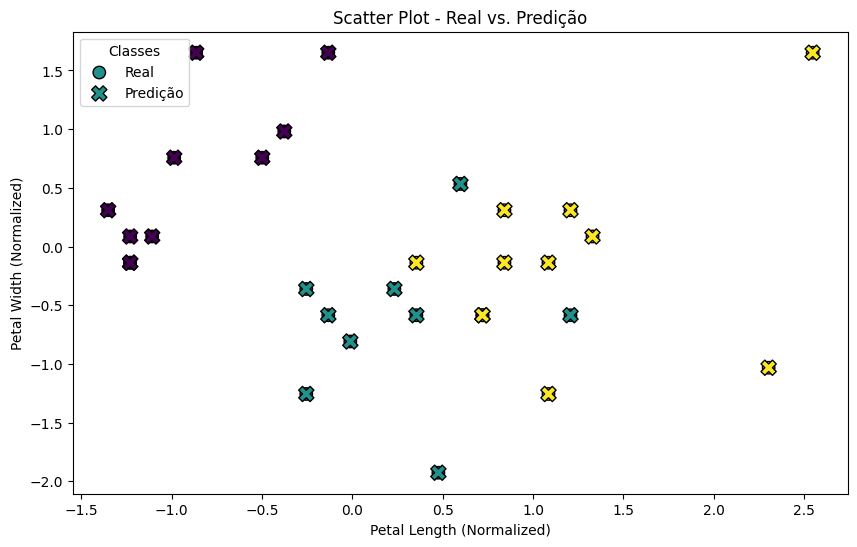

In [36]:
# Scatter plot para o conjunto de teste
plt.figure(figsize=(10, 6))

# Plot dos pontos de teste
plt.scatter(X_test_normalized[:, 0], X_test_normalized[:, 1], c=y_test, cmap='viridis', label='Real', edgecolors='k', s=80)

# Plot das previsões
plt.scatter(X_test_normalized[:, 0], X_test_normalized[:, 1], c=y_pred, cmap='viridis', marker='X', label='Predição', edgecolors='k', s=120)

# Adição de rótulos e título
plt.xlabel('Petal Length (Normalized)')
plt.ylabel('Petal Width (Normalized)')
plt.title('Scatter Plot - Real vs. Predição')

# Adição de uma legenda
legend = plt.legend(title='Classes', loc='upper left')
plt.setp(legend.get_texts(), color='black')

# Exibição do gráfico
plt.show()

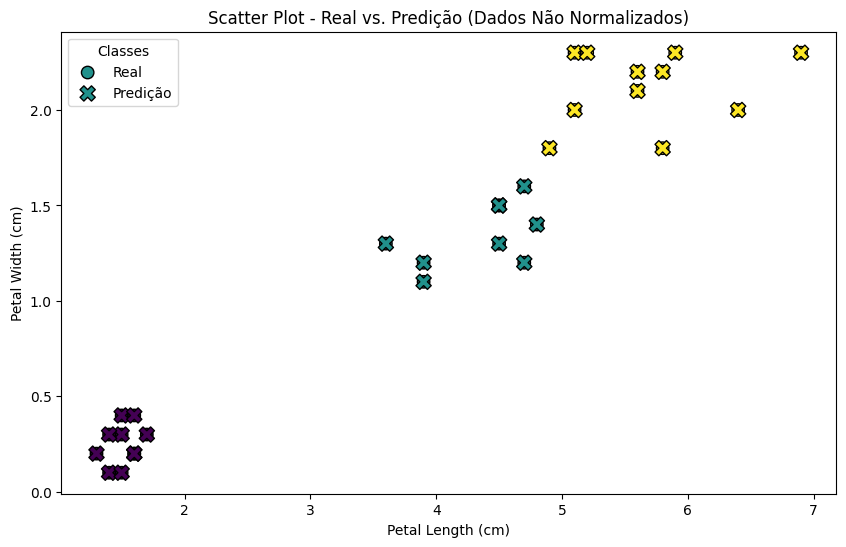

In [37]:
# Scatter plot para o conjunto de teste
plt.figure(figsize=(10, 6))

# Plot dos pontos de teste
plt.scatter(X_test_unnormalized['petal length (cm)'], X_test_unnormalized['petal width (cm)'], c=y_test, cmap='viridis', label='Real', edgecolors='k', s=80)

# Plot das previsões
plt.scatter(X_test_unnormalized['petal length (cm)'], X_test_unnormalized['petal width (cm)'], c=y_pred, cmap='viridis', marker='X', label='Predição', edgecolors='k', s=120)

# Adição de rótulos e título
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatter Plot - Real vs. Predição (Dados Não Normalizados)')

# Adição de uma legenda
legend = plt.legend(title='Classes', loc='upper left')
plt.setp(legend.get_texts(), color='black')

# Exibição do gráfico
plt.show()

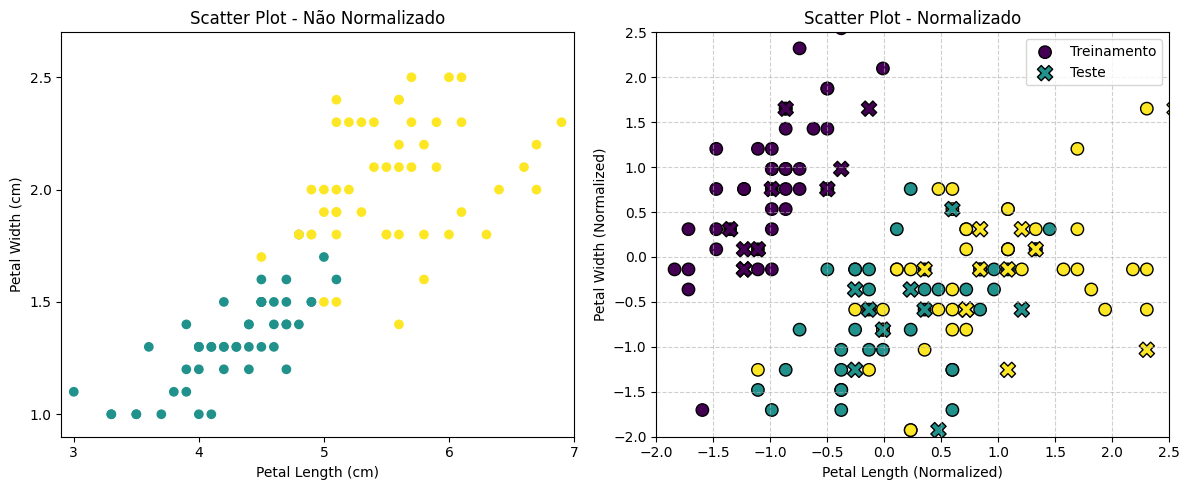

In [42]:
import matplotlib.pyplot as plt

# Scatter plot para o conjunto de dados não normalizado
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=y, cmap='viridis')
plt.title('Scatter Plot - Não Normalizado')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.xlim(2.9, 7)
plt.xticks([3, 4, 5, 6, 7])
plt.ylim(0.9, 2.7)
plt.yticks([1, 1.5, 2, 2.5])

# Scatter plot para o conjunto de dados normalizado
plt.subplot(1, 2, 2)
plt.scatter(X_train_normalized[:, 0], X_train_normalized[:, 1], c=y_train, cmap='viridis', label='Treinamento', edgecolors='k', s=80)
plt.scatter(X_test_normalized[:, 0], X_test_normalized[:, 1], c=y_test, cmap='viridis', marker='X', label='Teste', edgecolors='k', s=120)
plt.title('Scatter Plot - Normalizado')
plt.xlabel('Petal Length (Normalized)')
plt.ylabel('Petal Width (Normalized)')
plt.xlim(-2, 2.5)  # Ajuste para melhor visualização do gráfico normalizado
plt.ylim(-2, 2.5)  # Ajuste para melhor visualização do gráfico normalizado
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()


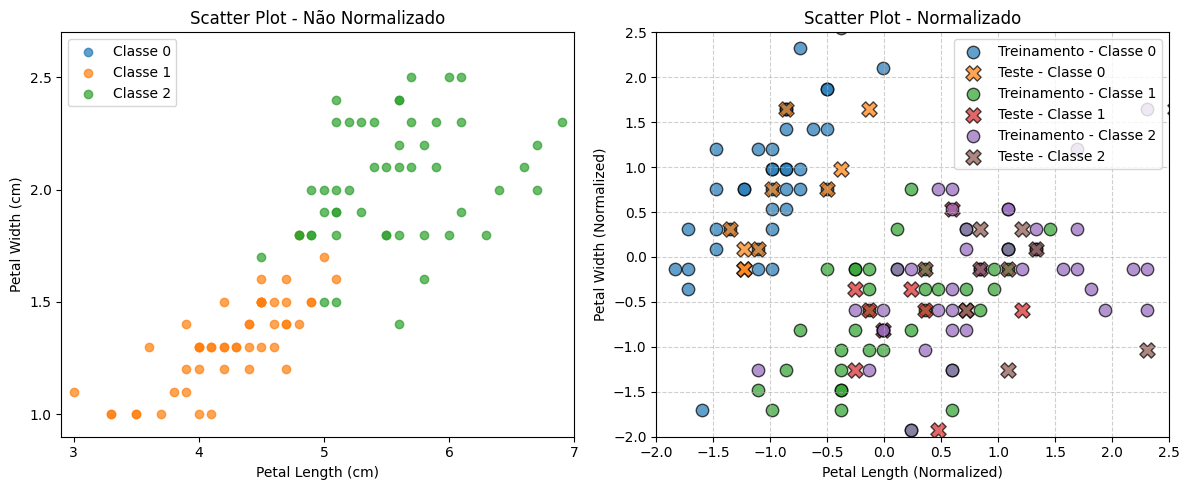

In [43]:
import matplotlib.pyplot as plt

# Scatter plot para o conjunto de dados não normalizado
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for class_label in set(y):
    class_data = X[y == class_label]
    plt.scatter(class_data['petal length (cm)'], class_data['petal width (cm)'], label=f'Classe {class_label}', alpha=0.7)

plt.title('Scatter Plot - Não Normalizado')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.xlim(2.9, 7)
plt.xticks([3, 4, 5, 6, 7])
plt.ylim(0.9, 2.7)
plt.yticks([1, 1.5, 2, 2.5])
plt.legend()

# Scatter plot para o conjunto de dados normalizado
plt.subplot(1, 2, 2)
for class_label in set(y_train):
    class_data_train = X_train_normalized[y_train == class_label]
    class_data_test = X_test_normalized[y_test == class_label]
    plt.scatter(class_data_train[:, 0], class_data_train[:, 1], label=f'Treinamento - Classe {class_label}', edgecolors='k', s=80, alpha=0.7)
    plt.scatter(class_data_test[:, 0], class_data_test[:, 1], label=f'Teste - Classe {class_label}', marker='X', edgecolors='k', s=120, alpha=0.7)

plt.title('Scatter Plot - Normalizado')
plt.xlabel('Petal Length (Normalized)')
plt.ylabel('Petal Width (Normalized)')
plt.xlim(-2, 2.5)  # Ajuste para melhor visualização do gráfico normalizado
plt.ylim(-2, 2.5)  # Ajuste para melhor visualização do gráfico normalizado
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()
